In [2]:
#BEKK-GARCH Implementation - Block 1: Setup and Data Preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import linalg
import warnings
warnings.filterwarnings('ignore')


class BEKKGARCHData:
    """
    Data preparation and validation for BEKK-GARCH model.
    """

    def __init__(self, returns1, returns2):
        """
        Initialize with two return series.

        Parameters:
        -----------
        returns1 : pd.Series
            First return series (e.g., stock 1)
        returns2 : pd.Series
            Second return series (e.g., stock 2)
        """
        self.returns1_raw = returns1
        self.returns2_raw = returns2
        self.returns_matrix = None
        self.dates = None
        self.T = None

    def prepare_data(self):
        """
        Align dates and prepare return matrix.
        """
        # Combine series and drop NaN
        df = pd.DataFrame({
            'r1': self.returns1_raw,
            'r2': self.returns2_raw
        }).dropna()

        self.dates = df.index
        self.T = len(df)
        self.returns_matrix = df.values  # T x 2 matrix

        print("="*70)
        print("DATA PREPARATION SUMMARY")
        print("="*70)
        print(f"Sample size: {self.T}")
        print(f"Date range: {self.dates[0]} to {self.dates[-1]}")
        print(f"\nSeries 1 statistics:")
        print(f"  Mean: {df['r1'].mean():.6f}")
        print(f"  Std Dev: {df['r1'].std():.6f}")
        print(f"  Min: {df['r1'].min():.6f}")
        print(f"  Max: {df['r1'].max():.6f}")
        print(f"\nSeries 2 statistics:")
        print(f"  Mean: {df['r2'].mean():.6f}")
        print(f"  Std Dev: {df['r2'].std():.6f}")
        print(f"  Min: {df['r2'].min():.6f}")
        print(f"  Max: {df['r2'].max():.6f}")
        print(f"\nUnconditional correlation: {df['r1'].corr(df['r2']):.4f}")
        print("="*70 + "\n")

        return self

    def get_returns_demeaned(self):
        """
        Return demeaned returns (centered at zero).
        """
        means = np.mean(self.returns_matrix, axis=0)
        return self.returns_matrix - means, means

    def plot_returns(self, figsize=(14, 8)):
        """
        Plot both return series.
        """
        fig, axes = plt.subplots(3, 1, figsize=figsize)

        # Series 1
        axes[0].plot(self.dates, self.returns_matrix[:, 0],
                     linewidth=0.7, alpha=0.7, color='blue')
        axes[0].set_title('Return Series 1', fontsize=11, fontweight='bold')
        axes[0].set_ylabel('Returns')
        axes[0].grid(True, alpha=0.3)

        # Series 2
        axes[1].plot(self.dates, self.returns_matrix[:, 1],
                     linewidth=0.7, alpha=0.7, color='green')
        axes[1].set_title('Return Series 2', fontsize=11, fontweight='bold')
        axes[1].set_ylabel('Returns')
        axes[1].grid(True, alpha=0.3)

        # Rolling correlation
        df = pd.DataFrame(self.returns_matrix, columns=['r1', 'r2'], index=self.dates)
        rolling_corr = df['r1'].rolling(window=60).corr(df['r2'])
        axes[2].plot(self.dates, rolling_corr, linewidth=1.2, color='red')
        axes[2].set_title('Rolling Correlation (60-day window)',
                         fontsize=11, fontweight='bold')
        axes[2].set_ylabel('Correlation')
        axes[2].set_xlabel('Date')
        axes[2].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
        axes[2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return fig


In [3]:
#BEKK-GARCH Implementation - Block 1: Setup and Data Preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import linalg
import warnings
warnings.filterwarnings('ignore')


class BEKKGARCHData:
    """
    Data preparation and validation for BEKK-GARCH model.
    """

    def __init__(self, returns1, returns2):
        """
        Initialize with two return series.

        Parameters:
        -----------
        returns1 : pd.Series
            First return series (e.g., stock 1)
        returns2 : pd.Series
            Second return series (e.g., stock 2)
        """
        self.returns1_raw = returns1
        self.returns2_raw = returns2
        self.returns_matrix = None
        self.dates = None
        self.T = None

    def prepare_data(self):
        """
        Align dates and prepare return matrix.
        """
        # Combine series and drop NaN
        df = pd.DataFrame({
            'r1': self.returns1_raw,
            'r2': self.returns2_raw
        }).dropna()

        self.dates = df.index
        self.T = len(df)
        self.returns_matrix = df.values  # T x 2 matrix

        print("="*70)
        print("DATA PREPARATION SUMMARY")
        print("="*70)
        print(f"Sample size: {self.T}")
        print(f"Date range: {self.dates[0]} to {self.dates[-1]}")
        print(f"\nSeries 1 statistics:")
        print(f"  Mean: {df['r1'].mean():.6f}")
        print(f"  Std Dev: {df['r1'].std():.6f}")
        print(f"  Min: {df['r1'].min():.6f}")
        print(f"  Max: {df['r1'].max():.6f}")
        print(f"\nSeries 2 statistics:")
        print(f"  Mean: {df['r2'].mean():.6f}")
        print(f"  Std Dev: {df['r2'].std():.6f}")
        print(f"  Min: {df['r2'].min():.6f}")
        print(f"  Max: {df['r2'].max():.6f}")
        print(f"\nUnconditional correlation: {df['r1'].corr(df['r2']):.4f}")
        print("="*70 + "\n")

        return self

    def get_returns_demeaned(self):
        """
        Return demeaned returns (centered at zero).
        """
        means = np.mean(self.returns_matrix, axis=0)
        return self.returns_matrix - means, means

    def plot_returns(self, figsize=(14, 8)):
        """
        Plot both return series.
        """
        fig, axes = plt.subplots(3, 1, figsize=figsize)

        # Series 1
        axes[0].plot(self.dates, self.returns_matrix[:, 0],
                     linewidth=0.7, alpha=0.7, color='blue')
        axes[0].set_title('Return Series 1', fontsize=11, fontweight='bold')
        axes[0].set_ylabel('Returns')
        axes[0].grid(True, alpha=0.3)

        # Series 2
        axes[1].plot(self.dates, self.returns_matrix[:, 1],
                     linewidth=0.7, alpha=0.7, color='green')
        axes[1].set_title('Return Series 2', fontsize=11, fontweight='bold')
        axes[1].set_ylabel('Returns')
        axes[1].grid(True, alpha=0.3)

        # Rolling correlation
        df = pd.DataFrame(self.returns_matrix, columns=['r1', 'r2'], index=self.dates)
        rolling_corr = df['r1'].rolling(window=60).corr(df['r2'])
        axes[2].plot(self.dates, rolling_corr, linewidth=1.2, color='red')
        axes[2].set_title('Rolling Correlation (60-day window)',
                         fontsize=11, fontweight='bold')
        axes[2].set_ylabel('Correlation')
        axes[2].set_xlabel('Date')
        axes[2].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
        axes[2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return fig


In [4]:
"BEKK-GARCH Implementation - Block 2: Parameter Initialization"

import numpy as np


class BEKKParameters:
    """
    Parameter structure and initialization for BEKK-GARCH model.
    """

    def __init__(self, model_type='diagonal'):
        """
        Initialize parameter structure.

        Parameters:
        -----------
        model_type : str
            'full' - Full BEKK (13 parameters)
            'diagonal' - Diagonal BEKK (9 parameters) - RECOMMENDED
            'scalar' - Scalar BEKK (7 parameters)
        """
        self.model_type = model_type
        self.param_vector = None
        self.param_names = None
        self.n_params = None

    def initialize_from_data(self, returns_matrix):
        """
        Initialize parameters using sample statistics.

        Parameters:
        -----------
        returns_matrix : np.ndarray
            T x 2 matrix of returns
        """
        # Sample statistics
        mu = np.mean(returns_matrix, axis=0)  # [μ₁, μ₂]
        cov_unconditional = np.cov(returns_matrix.T)  # 2x2 covariance matrix

        # Demeaned returns
        epsilon = returns_matrix - mu

        if self.model_type == 'diagonal':
            params = self._initialize_diagonal(mu, cov_unconditional)
        elif self.model_type == 'full':
            params = self._initialize_full(mu, cov_unconditional)
        elif self.model_type == 'scalar':
            params = self._initialize_scalar(mu, cov_unconditional)
        else:
            raise ValueError("model_type must be 'full', 'diagonal', or 'scalar'")

        self.param_vector = params
        self.n_params = len(params)

        print(f"\nInitialized {self.model_type.upper()} BEKK with {self.n_params} parameters")
        self._print_initial_params()

        return self

    def _initialize_diagonal(self, mu, cov_matrix):
        """
        Initialize diagonal BEKK parameters.

        Parameters: [μ₁, μ₂, c₁₁, c₂₁, c₂₂, a₁₁, a₂₂, b₁₁, b₂₂]
        Total: 9 parameters
        """
        # Mean parameters
        mu1, mu2 = mu[0], mu[1]

        # C matrix (lower triangular)
        # C'C should be close to unconditional covariance
        # Use Cholesky decomposition as starting point
        L = np.linalg.cholesky(cov_matrix * 0.05)  # Scale down for initial variance
        c11 = L[0, 0]
        c21 = L[1, 0]
        c22 = L[1, 1]

        # A matrix (diagonal) - ARCH effects
        a11 = 0.08  # Typical value
        a22 = 0.08

        # B matrix (diagonal) - GARCH effects
        b11 = 0.88  # Typical value for persistence
        b22 = 0.88

        params = np.array([mu1, mu2, c11, c21, c22, a11, a22, b11, b22])

        self.param_names = ['mu1', 'mu2', 'c11', 'c21', 'c22',
                           'a11', 'a22', 'b11', 'b22']

        return params

    def _initialize_full(self, mu, cov_matrix):
        """
        Initialize full BEKK parameters.

        Parameters: [μ₁, μ₂, c₁₁, c₂₁, c₂₂, a₁₁, a₁₂, a₂₁, a₂₂, b₁₁, b₁₂, b₂₁, b₂₂]
        Total: 13 parameters
        """
        mu1, mu2 = mu[0], mu[1]

        # C matrix
        L = np.linalg.cholesky(cov_matrix * 0.05)
        c11 = L[0, 0]
        c21 = L[1, 0]
        c22 = L[1, 1]

        # A matrix (full) - start with near-diagonal
        a11 = 0.08
        a12 = 0.01  # Small cross-effect
        a21 = 0.01
        a22 = 0.08

        # B matrix (full) - start with near-diagonal
        b11 = 0.88
        b12 = 0.01  # Small cross-effect
        b21 = 0.01
        b22 = 0.88

        params = np.array([mu1, mu2, c11, c21, c22,
                          a11, a12, a21, a22,
                          b11, b12, b21, b22])

        self.param_names = ['mu1', 'mu2', 'c11', 'c21', 'c22',
                           'a11', 'a12', 'a21', 'a22',
                           'b11', 'b12', 'b21', 'b22']

        return params

    def _initialize_scalar(self, mu, cov_matrix):
        """
        Initialize scalar BEKK parameters.

        Parameters: [μ₁, μ₂, c₁₁, c₂₁, c₂₂, a, b]
        Total: 7 parameters
        """
        mu1, mu2 = mu[0], mu[1]

        # C matrix
        L = np.linalg.cholesky(cov_matrix * 0.05)
        c11 = L[0, 0]
        c21 = L[1, 0]
        c22 = L[1, 1]

        # Scalar parameters
        a = 0.08
        b = 0.88

        params = np.array([mu1, mu2, c11, c21, c22, a, b])

        self.param_names = ['mu1', 'mu2', 'c11', 'c21', 'c22', 'a', 'b']

        return params

    def _print_initial_params(self):
        """Print initial parameter values."""
        print("\nInitial Parameter Values:")
        print("-" * 40)
        for name, value in zip(self.param_names, self.param_vector):
            print(f"{name:>6} = {value:>12.6f}")
        print("-" * 40)

    def unpack_params(self, params=None):
        """
        Unpack parameter vector into structured components.

        Returns:
        --------
        mu : np.ndarray (2,)
        C : np.ndarray (2, 2)
        A : np.ndarray (2, 2)
        B : np.ndarray (2, 2)
        """
        if params is None:
            params = self.param_vector

        mu = params[0:2]

        if self.model_type == 'diagonal':
            # params = [μ₁, μ₂, c₁₁, c₂₁, c₂₂, a₁₁, a₂₂, b₁₁, b₂₂]
            C = np.array([[params[2], 0],
                         [params[3], params[4]]])
            A = np.array([[params[5], 0],
                         [0, params[6]]])
            B = np.array([[params[7], 0],
                         [0, params[8]]])

        elif self.model_type == 'full':
            # params = [μ₁, μ₂, c₁₁, c₂₁, c₂₂, a₁₁, a₁₂, a₂₁, a₂₂, b₁₁, b₁₂, b₂₁, b₂₂]
            C = np.array([[params[2], 0],
                         [params[3], params[4]]])
            A = np.array([[params[5], params[6]],
                         [params[7], params[8]]])
            B = np.array([[params[9], params[10]],
                         [params[11], params[12]]])

        elif self.model_type == 'scalar':
            # params = [μ₁, μ₂, c₁₁, c₂₁, c₂₂, a, b]
            C = np.array([[params[2], 0],
                         [params[3], params[4]]])
            a = params[5]
            b = params[6]
            A = np.array([[a, 0],
                         [0, a]])
            B = np.array([[b, 0],
                         [0, b]])

        return mu, C, A, B

    def get_bounds(self):
        """
        Get parameter bounds for optimization.
        """
        if self.model_type == 'diagonal':
            bounds = [
                (None, None),  # mu1
                (None, None),  # mu2
                (1e-6, None),  # c11 > 0
                (None, None),  # c21
                (1e-6, None),  # c22 > 0
                (0, 0.3),      # a11
                (0, 0.3),      # a22
                (0, 0.99),     # b11
                (0, 0.99),     # b22
            ]
        elif self.model_type == 'full':
            bounds = [
                (None, None),  # mu1
                (None, None),  # mu2
                (1e-6, None),  # c11 > 0
                (None, None),  # c21
                (1e-6, None),  # c22 > 0
                (-0.3, 0.3),   # a11
                (-0.3, 0.3),   # a12
                (-0.3, 0.3),   # a21
                (-0.3, 0.3),   # a22
                (-0.99, 0.99), # b11
                (-0.99, 0.99), # b12
                (-0.99, 0.99), # b21
                (-0.99, 0.99), # b22
            ]
        elif self.model_type == 'scalar':
            bounds = [
                (None, None),  # mu1
                (None, None),  # mu2
                (1e-6, None),  # c11 > 0
                (None, None),  # c21
                (1e-6, None),  # c22 > 0
                (0, 0.3),      # a
                (0, 0.99),     # b
            ]

        return bounds


In [5]:
"""
BEKK-GARCH Implementation - Block 3: BEKK Variance Recursion
=============================================================
This is the core: Computing H_t = C'C + A'·ε_{t-1}·ε'_{t-1}·A + B'·H_{t-1}·B
"""

import numpy as np


class BEKKRecursion:
    """
    Core BEKK variance recursion and covariance matrix computation.
    """

    @staticmethod
    def compute_bekk_matrices(returns, mu, C, A, B):
        """
        Compute the full sequence of conditional covariance matrices H_t.

        This implements: H_t = C'C + A'·ε_{t-1}·ε'_{t-1}·A + B'·H_{t-1}·B

        Parameters:
        -----------
        returns : np.ndarray (T, 2)
            Return matrix
        mu : np.ndarray (2,)
            Mean vector [μ₁, μ₂]
        C : np.ndarray (2, 2)
            Lower triangular constant matrix
        A : np.ndarray (2, 2)
            ARCH effect matrix
        B : np.ndarray (2, 2)
            GARCH effect matrix

        Returns:
        --------
        H_matrices : np.ndarray (T, 2, 2)
            Array of conditional covariance matrices
        epsilon : np.ndarray (T, 2)
            Residuals
        """
        T = len(returns)

        # Compute residuals
        epsilon = returns - mu  # T x 2

        # Initialize H_matrices
        H_matrices = np.zeros((T, 2, 2))

        # Initial covariance (use sample covariance)
        H_matrices[0] = np.cov(epsilon.T)

        # Precompute constant term C'C (stays same for all t)
        C_transpose_C = C.T @ C  # 2x2 matrix

        # Recursion for t = 1, 2, ..., T-1
        for t in range(1, T):
            # Get previous residual as column vector
            eps_prev = epsilon[t-1].reshape(2, 1)  # 2x1

            # Compute ε_{t-1}·ε'_{t-1} (outer product)
            eps_outer = eps_prev @ eps_prev.T  # 2x2

            # ARCH component: A'·ε_{t-1}·ε'_{t-1}·A
            ARCH_component = A.T @ eps_outer @ A  # 2x2

            # GARCH component: B'·H_{t-1}·B
            GARCH_component = B.T @ H_matrices[t-1] @ B  # 2x2

            # Full BEKK equation
            H_matrices[t] = C_transpose_C + ARCH_component + GARCH_component

            # Ensure positive definiteness (numerical stability)
            # Add small value to diagonal if needed
            if not BEKKRecursion._is_positive_definite(H_matrices[t]):
                H_matrices[t] += np.eye(2) * 1e-8

        return H_matrices, epsilon

    @staticmethod
    def _is_positive_definite(matrix):
        """
        Check if matrix is positive definite.
        """
        try:
            np.linalg.cholesky(matrix)
            return True
        except np.linalg.LinAlgError:
            return False

    @staticmethod
    def extract_volatilities_and_correlation(H_matrices):
        """
        Extract time-varying volatilities and correlations from H_t matrices.

        Parameters:
        -----------
        H_matrices : np.ndarray (T, 2, 2)
            Conditional covariance matrices

        Returns:
        --------
        sigma1 : np.ndarray (T,)
            Volatility of series 1: sqrt(h₁₁,t)
        sigma2 : np.ndarray (T,)
            Volatility of series 2: sqrt(h₂₂,t)
        correlation : np.ndarray (T,)
            Conditional correlation: h₁₂,t / sqrt(h₁₁,t · h₂₂,t)
        covariance : np.ndarray (T,)
            Conditional covariance: h₁₂,t
        """
        T = len(H_matrices)

        sigma1 = np.sqrt(H_matrices[:, 0, 0])  # sqrt(h₁₁,t)
        sigma2 = np.sqrt(H_matrices[:, 1, 1])  # sqrt(h₂₂,t)
        covariance = H_matrices[:, 0, 1]        # h₁₂,t

        # Correlation: ρ₁₂,t = h₁₂,t / (σ₁,t · σ₂,t)
        correlation = covariance / (sigma1 * sigma2)

        # Clip correlation to [-1, 1] for numerical stability
        correlation = np.clip(correlation, -1, 1)

        return sigma1, sigma2, correlation, covariance

    @staticmethod
    def compute_standardized_residuals(epsilon, H_matrices):
        """
        Compute standardized residuals: z_t = H_t^{-1/2} · ε_t

        Parameters:
        -----------
        epsilon : np.ndarray (T, 2)
            Residuals
        H_matrices : np.ndarray (T, 2, 2)
            Conditional covariance matrices

        Returns:
        --------
        std_residuals : np.ndarray (T, 2)
            Standardized residuals
        """
        T = len(epsilon)
        std_residuals = np.zeros((T, 2))

        for t in range(T):
            # Compute H_t^{-1/2} using Cholesky decomposition
            # H_t = L_t @ L_t', so H_t^{-1/2} = L_t^{-1}
            try:
                L = np.linalg.cholesky(H_matrices[t])
                L_inv = np.linalg.inv(L)
                std_residuals[t] = L_inv @ epsilon[t]
            except np.linalg.LinAlgError:
                # If Cholesky fails, use simple standardization
                std_residuals[t] = epsilon[t] / np.sqrt(np.diag(H_matrices[t]))

        return std_residuals




In [6]:
"""
BEKK-GARCH Implementation - Block 4: Log-Likelihood Function
=============================================================
Implements the Gaussian log-likelihood for BEKK model estimation.
"""

import numpy as np
from scipy import linalg


class BEKKLikelihood:
    """
    Log-likelihood computation for BEKK-GARCH model.
    """

    @staticmethod
    def compute_log_likelihood(params, returns, param_structure):
        """
        Compute the negative log-likelihood for BEKK-GARCH model.

        The log-likelihood is:
        L = -T·log(2π) - 0.5·Σ(log|H_t| + ε'_t·H_t^{-1}·ε_t)

        Parameters:
        -----------
        params : np.ndarray
            Parameter vector to estimate
        returns : np.ndarray (T, 2)
            Return matrix
        param_structure : BEKKParameters
            Parameter structure object (contains model_type)

        Returns:
        --------
        neg_log_likelihood : float
            Negative log-likelihood (for minimization)
        """
        try:
            # Unpack parameters
            mu, C, A, B = param_structure.unpack_params(params)

            # Parameter validity checks
            if not BEKKLikelihood._check_parameter_validity(C, A, B):
                return 1e10  # Return large value if parameters invalid

            # Compute residuals
            T = len(returns)
            epsilon = returns - mu

            # Initialize
            log_likelihood = 0.0

            # Initial H_0 (use sample covariance)
            H = np.cov(epsilon.T)

            # Precompute C'C
            C_transpose_C = C.T @ C

            # Recursion
            for t in range(T):
                # Update H_t (except for t=0, use initial H)
                if t > 0:
                    eps_prev = epsilon[t-1].reshape(2, 1)
                    eps_outer = eps_prev @ eps_prev.T

                    H = C_transpose_C + A.T @ eps_outer @ A + B.T @ H @ B

                # Check positive definiteness
                if not BEKKLikelihood._is_positive_definite(H):
                    return 1e10

                # Compute log|H_t|
                sign, logdet = np.linalg.slogdet(H)
                if sign <= 0:
                    return 1e10

                # Compute ε'_t · H_t^{-1} · ε_t
                try:
                    H_inv = np.linalg.inv(H)
                    eps_t = epsilon[t].reshape(2, 1)
                    quad_form = (eps_t.T @ H_inv @ eps_t)[0, 0]
                except np.linalg.LinAlgError:
                    return 1e10

                # Add to log-likelihood
                log_likelihood += -0.5 * (logdet + quad_form)

            # Add constant term
            log_likelihood += -T * np.log(2 * np.pi)

            # Return negative for minimization
            return -log_likelihood

        except Exception as e:
            # If any error occurs, return large value
            return 1e10

    @staticmethod
    def _check_parameter_validity(C, A, B):
        """
        Check if parameters satisfy basic constraints.
        """
        # C must have positive diagonal elements
        if C[0, 0] <= 0 or C[1, 1] <= 0:
            return False

        # Check eigenvalues for stability (A and B shouldn't be too large)
        try:
            eig_A = np.max(np.abs(np.linalg.eigvals(A)))
            eig_B = np.max(np.abs(np.linalg.eigvals(B)))

            if eig_A > 1 or eig_B > 1:
                return False
        except:
            return False

        return True

    @staticmethod
    def _is_positive_definite(matrix):
        """Check if matrix is positive definite."""
        try:
            np.linalg.cholesky(matrix)
            return True
        except np.linalg.LinAlgError:
            return False

    @staticmethod
    def compute_information_criteria(log_likelihood, n_params, T):
        """
        Compute AIC and BIC.

        Parameters:
        -----------
        log_likelihood : float
            Log-likelihood value
        n_params : int
            Number of parameters
        T : int
            Sample size

        Returns:
        --------
        aic : float
            Akaike Information Criterion
        bic : float
            Bayesian Information Criterion
        """
        aic = -2 * log_likelihood + 2 * n_params
        bic = -2 * log_likelihood + n_params * np.log(T)

        return aic, bic


In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import linalg
import warnings
warnings.filterwarnings('ignore')


class BEKKGARCH:
    """
    Complete BEKK-GARCH(1,1) Model for bivariate returns.

    Model: H_t = C'C + A'·ε_{t-1}·ε'_{t-1}·A + B'·H_{t-1}·B
    """

    def __init__(self, model_type='diagonal'):
        """
        Initialize BEKK-GARCH model.

        Parameters:
        -----------
        model_type : str
            'diagonal' - Diagonal BEKK (9 params) - RECOMMENDED
            'full' - Full BEKK (13 params)
            'scalar' - Scalar BEKK (7 params)
        """
        self.model_type = model_type
        self.params = None
        self.param_names = None
        self.returns = None
        self.dates = None
        self.convergence = None
        self.log_likelihood = None
        self.H_matrices = None
        self.epsilon = None
        self.sigma1 = None
        self.sigma2 = None
        self.correlation = None
        self.covariance = None

    def fit(self, returns1, returns2, method='L-BFGS-B', max_iter=1000, display=True):
        """
        Estimate BEKK-GARCH model using maximum likelihood.

        Parameters:
        -----------
        returns1 : pd.Series
            First return series
        returns2 : pd.Series
            Second return series
        method : str
            Optimization method
        max_iter : int
            Maximum iterations
        display : bool
            Display estimation progress and results
        """
        # Prepare data
        df = pd.DataFrame({'r1': returns1, 'r2': returns2}).dropna()
        self.dates = df.index
        self.returns = df.values
        T = len(self.returns)

        if display:
            print("="*70)
            print(f"BEKK-GARCH ESTIMATION ({self.model_type.upper()})")
            print("="*70)
            print(f"Sample size: {T}")
            print(f"Date range: {self.dates[0]} to {self.dates[-1]}")
            print(f"Model type: {self.model_type}")

        # Initialize parameters
        initial_params, param_names, bounds = self._initialize_parameters()
        self.param_names = param_names

        if display:
            print(f"\nEstimating {len(initial_params)} parameters...")
            print("This may take a few minutes...\n")

        # Optimize
        result = minimize(
            self._negative_log_likelihood,
            initial_params,
            method=method,
            bounds=bounds,
            options={'maxiter': max_iter, 'disp': display}
        )

        self.params = result.x
        self.convergence = result
        self.log_likelihood = -result.fun

        # Compute conditional variances with estimated parameters
        self._compute_conditional_matrices()

        if display:
            self._print_results()

        return self

    def _initialize_parameters(self):
        """Initialize parameters based on data."""
        mu = np.mean(self.returns, axis=0)
        cov_matrix = np.cov(self.returns.T)

        if self.model_type == 'diagonal':
            L = np.linalg.cholesky(cov_matrix * 0.05)
            params = np.array([
                mu[0], mu[1],
                L[0, 0], L[1, 0], L[1, 1],
                0.08, 0.08,
                0.88, 0.88
            ])
            names = ['mu1', 'mu2', 'c11', 'c21', 'c22', 'a11', 'a22', 'b11', 'b22']
            bounds = [
                (None, None), (None, None),
                (1e-6, None), (None, None), (1e-6, None),
                (0, 0.3), (0, 0.3),
                (0, 0.99), (0, 0.99)
            ]
        elif self.model_type == 'full':
            L = np.linalg.cholesky(cov_matrix * 0.05)
            params = np.array([
                mu[0], mu[1],
                L[0, 0], L[1, 0], L[1, 1],
                0.08, 0.01, 0.01, 0.08,
                0.88, 0.01, 0.01, 0.88
            ])
            names = ['mu1', 'mu2', 'c11', 'c21', 'c22',
                    'a11', 'a12', 'a21', 'a22',
                    'b11', 'b12', 'b21', 'b22']
            bounds = [
                (None, None), (None, None),
                (1e-6, None), (None, None), (1e-6, None),
                (-0.3, 0.3), (-0.3, 0.3), (-0.3, 0.3), (-0.3, 0.3),
                (-0.99, 0.99), (-0.99, 0.99), (-0.99, 0.99), (-0.99, 0.99)
            ]
        else:  # scalar
            L = np.linalg.cholesky(cov_matrix * 0.05)
            params = np.array([
                mu[0], mu[1],
                L[0, 0], L[1, 0], L[1, 1],
                0.08, 0.88
            ])
            names = ['mu1', 'mu2', 'c11', 'c21', 'c22', 'a', 'b']
            bounds = [
                (None, None), (None, None),
                (1e-6, None), (None, None), (1e-6, None),
                (0, 0.3), (0, 0.99)
            ]

        return params, names, bounds

    def _unpack_params(self, params):
        """Unpack parameter vector into matrices."""
        mu = params[0:2]

        if self.model_type == 'diagonal':
            C = np.array([[params[2], 0], [params[3], params[4]]])
            A = np.array([[params[5], 0], [0, params[6]]])
            B = np.array([[params[7], 0], [0, params[8]]])
        elif self.model_type == 'full':
            C = np.array([[params[2], 0], [params[3], params[4]]])
            A = np.array([[params[5], params[6]], [params[7], params[8]]])
            B = np.array([[params[9], params[10]], [params[11], params[12]]])
        else:  # scalar
            C = np.array([[params[2], 0], [params[3], params[4]]])
            A = np.array([[params[5], 0], [0, params[5]]])
            B = np.array([[params[6], 0], [0, params[6]]])

        return mu, C, A, B

    def _negative_log_likelihood(self, params):
        """Compute negative log-likelihood."""
        try:
            mu, C, A, B = self._unpack_params(params)

            # Check validity
            if C[0, 0] <= 0 or C[1, 1] <= 0:
                return 1e10

            T = len(self.returns)
            epsilon = self.returns - mu

            log_likelihood = 0.0
            H = np.cov(epsilon.T)
            C_transpose_C = C.T @ C

            for t in range(T):
                if t > 0:
                    eps_prev = epsilon[t-1].reshape(2, 1)
                    eps_outer = eps_prev @ eps_prev.T
                    H = C_transpose_C + A.T @ eps_outer @ A + B.T @ H @ B

                try:
                    sign, logdet = np.linalg.slogdet(H)
                    if sign <= 0:
                        return 1e10

                    H_inv = np.linalg.inv(H)
                    eps_t = epsilon[t].reshape(2, 1)
                    quad_form = (eps_t.T @ H_inv @ eps_t)[0, 0]

                    log_likelihood += -0.5 * (logdet + quad_form)
                except:
                    return 1e10

            log_likelihood += -T * np.log(2 * np.pi)
            return -log_likelihood

        except:
            return 1e10

    def _compute_conditional_matrices(self):
        """Compute H_t matrices and extract volatilities/correlations."""
        mu, C, A, B = self._unpack_params(self.params)

        T = len(self.returns)
        self.epsilon = self.returns - mu
        self.H_matrices = np.zeros((T, 2, 2))
        self.H_matrices[0] = np.cov(self.epsilon.T)

        C_transpose_C = C.T @ C

        for t in range(1, T):
            eps_prev = self.epsilon[t-1].reshape(2, 1)
            eps_outer = eps_prev @ eps_prev.T
            self.H_matrices[t] = C_transpose_C + A.T @ eps_outer @ A + B.T @ self.H_matrices[t-1] @ B

        # Extract components
        self.sigma1 = np.sqrt(self.H_matrices[:, 0, 0])
        self.sigma2 = np.sqrt(self.H_matrices[:, 1, 1])
        self.covariance = self.H_matrices[:, 0, 1]
        self.correlation = self.covariance / (self.sigma1 * self.sigma2)
        self.correlation = np.clip(self.correlation, -1, 1)

    def _print_results(self):
        """Print estimation results."""
        mu, C, A, B = self._unpack_params(self.params)

        print("\n" + "="*70)
        print("ESTIMATION RESULTS")
        print("="*70)
        print(f"Log-Likelihood: {self.log_likelihood:.4f}")
        print(f"Convergence: {self.convergence.success}")
        print(f"Iterations: {self.convergence.nit}")

        T = len(self.returns)
        n_params = len(self.params)
        aic = -2 * self.log_likelihood + 2 * n_params
        bic = -2 * self.log_likelihood + n_params * np.log(T)

        print(f"AIC: {aic:.2f}")
        print(f"BIC: {bic:.2f}")

        print("\n" + "-"*70)
        print("PARAMETERS:")
        print("-"*70)
        for name, value in zip(self.param_names, self.params):
            print(f"{name:>6} = {value:>12.6f}")

        print("\n" + "-"*70)
        print("MATRICES:")
        print("-"*70)
        print("C matrix:")
        print(C)
        print("\nA matrix (ARCH effects):")
        print(A)
        print("\nB matrix (GARCH effects):")
        print(B)

        print("\n" + "-"*70)
        print("VOLATILITY SUMMARY:")
        print("-"*70)
        print(f"Series 1 - Mean volatility: {np.mean(self.sigma1):.6f}")
        print(f"Series 1 - Volatility range: [{np.min(self.sigma1):.6f}, {np.max(self.sigma1):.6f}]")
        print(f"Series 2 - Mean volatility: {np.mean(self.sigma2):.6f}")
        print(f"Series 2 - Volatility range: [{np.min(self.sigma2):.6f}, {np.max(self.sigma2):.6f}]")
        print(f"Average correlation: {np.mean(self.correlation):.4f}")
        print(f"Correlation range: [{np.min(self.correlation):.4f}, {np.max(self.correlation):.4f}]")
        print("="*70 + "\n")

    def plot_results(self, figsize=(14, 10)):
        """Plot estimation results."""
        if self.H_matrices is None:
            raise ValueError("Model must be fitted first")

        fig, axes = plt.subplots(4, 1, figsize=figsize)

        # Returns
        axes[0].plot(self.dates, self.returns[:, 0],
                     linewidth=0.6, alpha=0.7, label='Series 1', color='blue')
        axes[0].plot(self.dates, self.returns[:, 1],
                     linewidth=0.6, alpha=0.7, label='Series 2', color='green')
        axes[0].set_title('Return Series', fontsize=11, fontweight='bold')
        axes[0].set_ylabel('Returns')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)

        # Volatilities
        axes[1].plot(self.dates, self.sigma1 * np.sqrt(252),
                     linewidth=1, label='σ₁ (Series 1)', color='blue')
        axes[1].plot(self.dates, self.sigma2 * np.sqrt(252),
                     linewidth=1, label='σ₂ (Series 2)', color='green')
        axes[1].set_title('Conditional Volatilities (Annualized)',
                         fontsize=11, fontweight='bold')
        axes[1].set_ylabel('Volatility')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)

        # Correlation
        axes[2].plot(self.dates, self.correlation, linewidth=1, color='red')
        axes[2].axhline(y=np.mean(self.correlation), color='black',
                       linestyle='--', linewidth=1, label='Mean')
        axes[2].set_title('Conditional Correlation ρ₁₂',
                         fontsize=11, fontweight='bold')
        axes[2].set_ylabel('Correlation')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)

        # Covariance
        axes[3].plot(self.dates, self.covariance * 252, linewidth=1, color='purple')
        axes[3].set_title('Conditional Covariance (Annualized)',
                         fontsize=11, fontweight='bold')
        axes[3].set_ylabel('Covariance')
        axes[3].set_xlabel('Date')
        axes[3].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return fig

    def get_summary_statistics(self):
        """Get summary statistics as DataFrame."""
        if self.H_matrices is None:
            raise ValueError("Model must be fitted first")

        stats = {
            'Model Type': self.model_type,
            'Sample Size': len(self.returns),
            'Log-Likelihood': self.log_likelihood,
            'Convergence': self.convergence.success,
            'Mean Vol Series 1': np.mean(self.sigma1),
            'Mean Vol Series 2': np.mean(self.sigma2),
            'Mean Correlation': np.mean(self.correlation),
            'Min Correlation': np.min(self.correlation),
            'Max Correlation': np.max(self.correlation)
        }

        return pd.DataFrame([stats]).T.rename(columns={0: 'Value'})



In [8]:
import yfinance as yf
up= yf.download(['XOP'],start='2016-10-01',end='2025-10-30')

[*********************100%***********************]  1 of 1 completed


In [9]:
mid= yf.download(['ENFR'],start='2016-10-01',end='2025-10-30')

[*********************100%***********************]  1 of 1 completed


In [10]:
import numpy as np
up['up_ret'] = up['Close'].pct_change()


In [11]:
up.dropna(inplace=True)

In [12]:
up['up_log_ret']= np.log(1+up['up_ret'])

In [13]:
mid['mid_ret'] = mid['Close'].pct_change()

In [14]:
mid.dropna(inplace=True)

In [15]:
mid['mid_log_ret']= np.log(1+mid['mid_ret'])

In [16]:
up

Price,Close,High,Low,Open,Volume,up_ret,up_log_ret
Ticker,XOP,XOP,XOP,XOP,XOP,,
Date,,,,,,,
2016-10-04,128.037720,130.794833,127.230754,130.324096,4761300,-0.011935,-0.012007
2016-10-05,131.063782,132.038862,129.550729,130.391312,4076325,0.023634,0.023359
2016-10-06,130.794785,132.812180,129.550712,132.475951,3379050,-0.002052,-0.002055
2016-10-07,128.878326,131.366448,128.306723,130.794857,3653150,-0.014652,-0.014761
2016-10-10,131.500900,132.913075,128.878284,128.878284,4211250,0.020349,0.020145
...,...,...,...,...,...,...,...
2025-10-23,129.660004,130.270004,127.519997,128.490005,4361900,0.038111,0.037402
2025-10-24,128.460007,130.550003,128.410004,130.179993,2139800,-0.009255,-0.009298


In [17]:
mid

Price,Close,High,Low,Open,Volume,mid_ret,mid_log_ret
Ticker,ENFR,ENFR,ENFR,ENFR,ENFR,,
Date,,,,,,,
2016-10-04,14.052143,14.188753,13.983839,14.188753,9800,-0.011359,-0.011424
2016-10-05,14.095614,14.201176,14.095614,14.201176,2500,0.003094,0.003089
2016-10-06,14.089400,14.089400,14.033515,14.064562,3600,-0.000441,-0.000441
2016-10-07,13.965212,14.045936,13.965212,14.045936,1400,-0.008814,-0.008853
2016-10-10,14.163914,14.163914,14.120447,14.120447,1700,0.014228,0.014128
...,...,...,...,...,...,...,...
2025-10-23,30.639999,31.150000,30.600000,31.150000,65900,-0.006485,-0.006506
2025-10-24,30.360001,30.770000,30.280001,30.770000,56700,-0.009138,-0.009180


In [18]:
model = BEKKGARCH(model_type='full')

model.fit(up['up_log_ret'], mid['mid_log_ret'])



BEKK-GARCH ESTIMATION (FULL)
Sample size: 2281
Date range: 2016-10-04 00:00:00 to 2025-10-29 00:00:00
Model type: full

Estimating 13 parameters...
This may take a few minutes...


ESTIMATION RESULTS
Log-Likelihood: 13304.3011
Convergence: True
Iterations: 414
AIC: -26582.60
BIC: -26508.08

----------------------------------------------------------------------
PARAMETERS:
----------------------------------------------------------------------
   mu1 =     0.000413
   mu2 =     0.000653
   c11 =     0.001755
   c21 =     0.002697
   c22 =     0.002160
   a11 =     0.260764
   a12 =     0.039855
   a21 =     0.149314
   a22 =     0.300000
   b11 =     0.963565
   b12 =    -0.006244
   b21 =    -0.055421
   b22 =     0.932076

----------------------------------------------------------------------
MATRICES:
----------------------------------------------------------------------
C matrix:
[[0.00175498 0.        ]
 [0.00269718 0.00216035]]

A matrix (ARCH effects):
[[0.26076395 0.03985477]
 [0

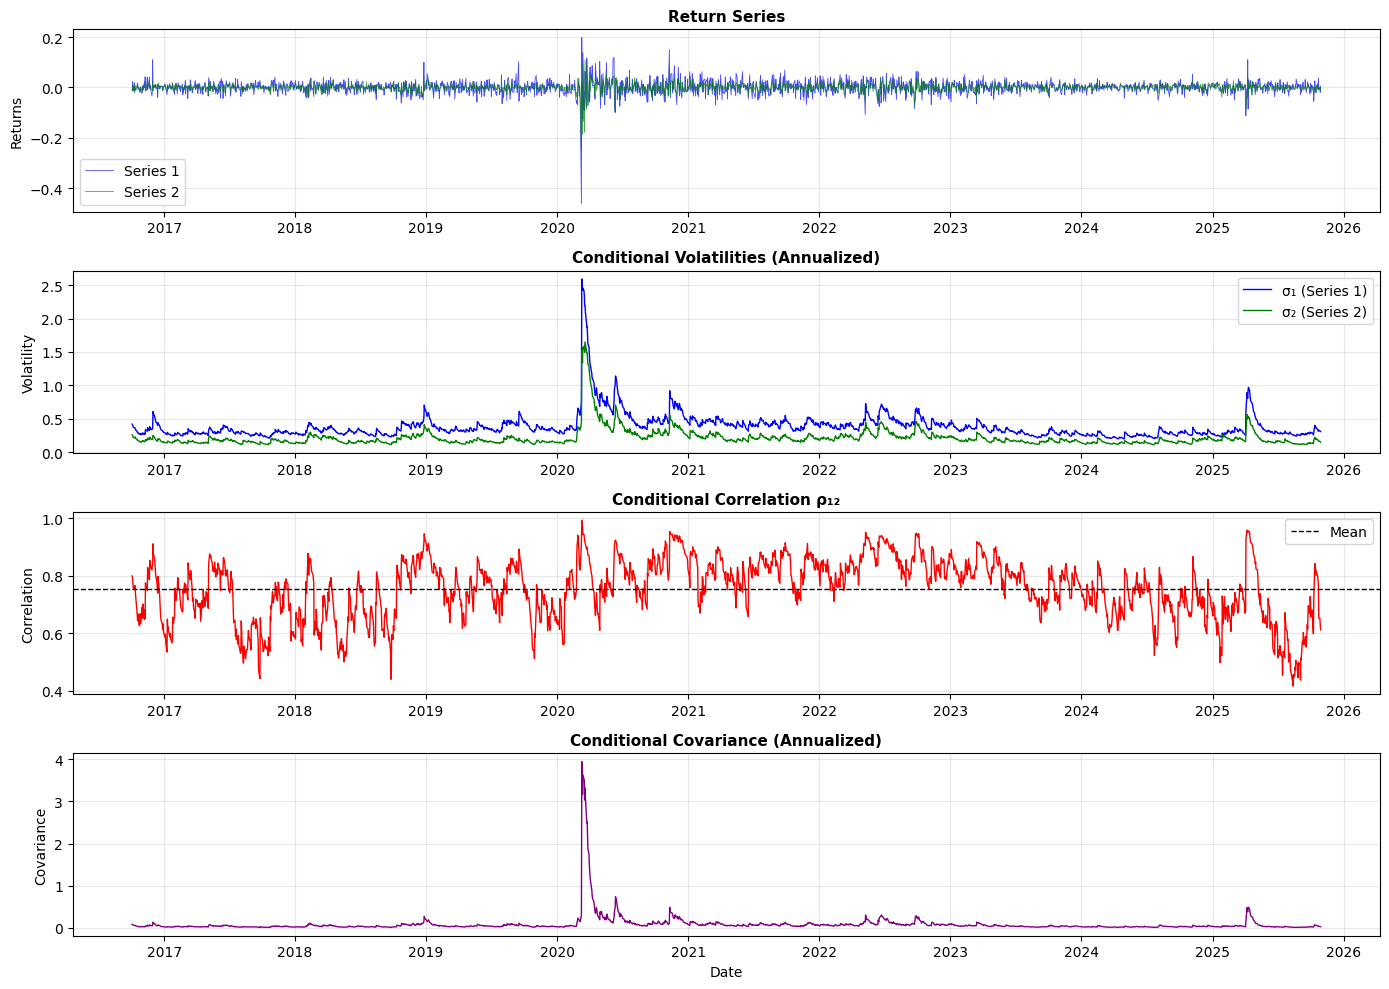

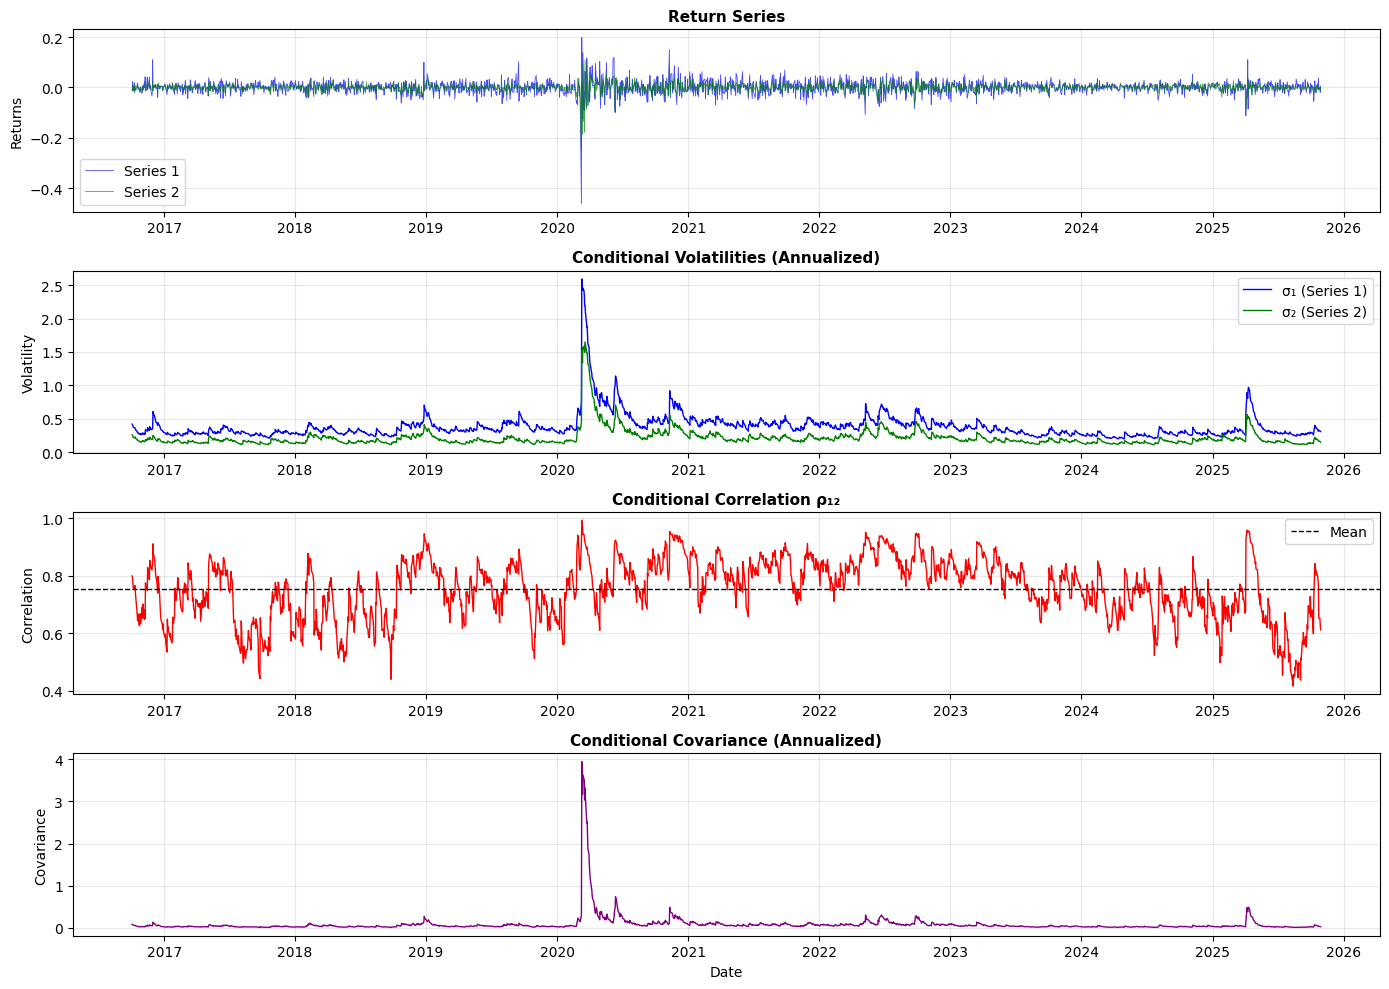

In [19]:
model.plot_results()

In [2]:
import numpy as np

# inputs:
# e = np.array([e1t, e2t])
# H = np.array([[h11t, h12t],
#               [h12t, h22t]])

C = np.array([[0.00175498, 0.0],
              [0.00269718, 0.00216035]])
A = np.array([[0.26076395, 0.03985477],
              [0.14931412, 0.30000000]])
B = np.array([[0.96356503, -0.00624395],
              [-0.05542129, 0.93207558]])

Cc = C.T.dot(C)  # constant matrix

def bekk_step(e, H):
    e = e.reshape(2,1)            # column vector
    H_next = Cc + A.T.dot(e.dot(e.T)).dot(A) + B.T.dot(H).dot(B)
    # return scalar elements or full matrix
    h11 = H_next[0,0]; h12 = H_next[0,1]; h22 = H_next[1,1]
    return H_next, h11, h12, h22


NameError: name 'e' is not defined

In [4]:
def print_bekk_equations():
    print("BEKK(1,1) Conditional Variance Equations\n")
    print("Given parameter estimates:\n")
    print("A = [[0.260764, 0.039855],")
    print("     [0.149314, 0.300000]]")
    print("B = [[ 0.963565, -0.006244],")
    print("     [-0.055421,  0.932076]]")
    print("C'C (constant) ≈ [[1.0357e-05, 5.827e-06], [5.827e-06, 4.667e-06]]\n")

    print("Equations (symbolic form, with coefficients substituted):\n")

    # h11,t+1
    print("h11_(t+1) = 1.0357e-05"
          " + (0.260764*e1_t + 0.149314*e2_t)**2"
          " + (0.963565**2)*h11_t"
          " + 2*(0.963565)*(-0.055421)*h12_t"
          " + (-0.055421**2)*h22_t\n")

    # h22,t+1
    print("h22_(t+1) = 4.667e-06"
          " + (0.039855*e1_t + 0.300000*e2_t)**2"
          " + (-0.006244**2)*h11_t"
          " + 2*(-0.006244)*(0.932076)*h12_t"
          " + (0.932076**2)*h22_t\n")

    # h12,t+1
    print("h12_(t+1) = 5.827e-06"
          " + (0.260764*e1_t + 0.149314*e2_t)"
          " * (0.039855*e1_t + 0.300000*e2_t)"
          " + (0.963565)*(-0.006244)*h11_t"
          " + (0.963565*0.932076 + (-0.006244)*(-0.055421))*h12_t"
          " + (-0.055421)*(0.932076)*h22_t\n")

# Run it:
print_bekk_equations()


BEKK(1,1) Conditional Variance Equations

Given parameter estimates:

A = [[0.260764, 0.039855],
     [0.149314, 0.300000]]
B = [[ 0.963565, -0.006244],
     [-0.055421,  0.932076]]
C'C (constant) ≈ [[1.0357e-05, 5.827e-06], [5.827e-06, 4.667e-06]]

Equations (symbolic form, with coefficients substituted):

h11_(t+1) = 1.0357e-05 + (0.260764*e1_t + 0.149314*e2_t)**2 + (0.963565**2)*h11_t + 2*(0.963565)*(-0.055421)*h12_t + (-0.055421**2)*h22_t

h22_(t+1) = 4.667e-06 + (0.039855*e1_t + 0.300000*e2_t)**2 + (-0.006244**2)*h11_t + 2*(-0.006244)*(0.932076)*h12_t + (0.932076**2)*h22_t

h12_(t+1) = 5.827e-06 + (0.260764*e1_t + 0.149314*e2_t) * (0.039855*e1_t + 0.300000*e2_t) + (0.963565)*(-0.006244)*h11_t + (0.963565*0.932076 + (-0.006244)*(-0.055421))*h12_t + (-0.055421)*(0.932076)*h22_t



In [5]:
def print_garch_structural_breaks():
    print("GARCH(1,1) Model with Structural Breaks\n")
    print("Base parameter estimates:")
    print("μ      = 0.000570")
    print("ω      = 1.000000e-06")
    print("α      = 0.079956")
    print("β      = 0.899953")
    print("α + β  = 0.979910 (high persistence)\n")

    print("Variance equation form:")
    print("h_t+1 = (ω + δ_i) + α * ε_t² + β * h_t,     where δ_i changes by regime\n")

    # Regime-specific deltas
    deltas = [
        1.767418e-06, 7.460303e-06, 1.142992e-06, 9.504071e-06, 1.187751e-06,
        5.138227e-04, 4.534735e-06, 1.091884e-05, 3.850745e-06, 7.065962e-06,
        2.007273e-06, 9.928397e-07, 1.289128e-05, -2.610063e-05, 6.855496e-07
    ]
    periods = [
        "2016-10-17 to 2018-01-29", "2018-01-29 to 2018-04-18", "2018-04-18 to 2018-10-10",
        "2018-10-10 to 2019-01-16", "2019-01-16 to 2020-02-24", "2020-02-24 to 2020-04-03",
        "2020-04-03 to 2020-06-29", "2020-06-29 to 2020-12-08", "2020-12-08 to 2022-04-22",
        "2022-04-22 to 2023-01-09", "2023-01-09 to 2023-12-19", "2023-12-19 to 2024-11-05",
        "2024-11-05 to 2025-04-03", "2025-04-03 to 2025-04-25", "2025-04-25 to 2025-10-29"
    ]

    print("Regime-specific equations:\n")
    for i, (δ, period) in enumerate(zip(deltas, periods)):
        omega_i = 1.000000e-06 + δ
        print(f"Regime {i}: {period}")
        print(f"h_(t+1) = {omega_i:.8e} + 0.079956 * ε_t² + 0.899953 * h_t")
        print("-" * 70)

# Run it:
print_garch_structural_breaks()


GARCH(1,1) Model with Structural Breaks

Base parameter estimates:
μ      = 0.000570
ω      = 1.000000e-06
α      = 0.079956
β      = 0.899953
α + β  = 0.979910 (high persistence)

Variance equation form:
h_t+1 = (ω + δ_i) + α * ε_t² + β * h_t,     where δ_i changes by regime

Regime-specific equations:

Regime 0: 2016-10-17 to 2018-01-29
h_(t+1) = 2.76741800e-06 + 0.079956 * ε_t² + 0.899953 * h_t
----------------------------------------------------------------------
Regime 1: 2018-01-29 to 2018-04-18
h_(t+1) = 8.46030300e-06 + 0.079956 * ε_t² + 0.899953 * h_t
----------------------------------------------------------------------
Regime 2: 2018-04-18 to 2018-10-10
h_(t+1) = 2.14299200e-06 + 0.079956 * ε_t² + 0.899953 * h_t
----------------------------------------------------------------------
Regime 3: 2018-10-10 to 2019-01-16
h_(t+1) = 1.05040710e-05 + 0.079956 * ε_t² + 0.899953 * h_t
----------------------------------------------------------------------
Regime 4: 2019-01-16 to 2020-0

In [6]:
def print_garch_equations():
    mu = 0.000570
    omega = 1.000000e-06
    alpha = 0.079956
    beta = 0.899953

    deltas = [
        1.767418e-06, 7.460303e-06, 1.142992e-06, 9.504071e-06, 1.187751e-06,
        5.138227e-04, 4.534735e-06, 1.091884e-05, 3.850745e-06, 7.065962e-06,
        2.007273e-06, 9.928397e-07, 1.289128e-05, -2.610063e-05, 6.855496e-07
    ]

    for i, delta in enumerate(deltas):
        omega_i = omega + delta
        print(f"Regime {i}:  h_t+1 = {omega_i:.8e} + {alpha:.6f} * ε_t² + {beta:.6f} * h_t")

print_garch_equations()


Regime 0:  h_t+1 = 2.76741800e-06 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 1:  h_t+1 = 8.46030300e-06 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 2:  h_t+1 = 2.14299200e-06 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 3:  h_t+1 = 1.05040710e-05 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 4:  h_t+1 = 2.18775100e-06 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 5:  h_t+1 = 5.14822700e-04 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 6:  h_t+1 = 5.53473500e-06 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 7:  h_t+1 = 1.19188400e-05 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 8:  h_t+1 = 4.85074500e-06 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 9:  h_t+1 = 8.06596200e-06 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 10:  h_t+1 = 3.00727300e-06 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 11:  h_t+1 = 1.99283970e-06 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 12:  h_t+1 = 1.38912800e-05 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 13:  h_t+1 = -2.51006300e-05 + 0.079956 * ε_t² + 0.899953 * h_t
Regime 14:  h_t+1 = 1.6855496